## Computer Vision

Let's do some very basic computer vision. We're going to import the MNIST handwritten digits data and $k$NN to predict values (i.e. "see/read").

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use the reshaped `X_test` and `y_test` data to create a $k$-nearest neighbor classifier of digit. What is the optimal number of neighbors $k$? If you can't determine this, play around with different values of $k$ for your classifier.
5. For the optimal number of neighbors, how well does your predictor perform on the test set? Report the accuracy, compute a confusion matrix, and explain your findings.
6. For your confusion matrix, which mistakes are most likely? Do you find any interesting patterns?
7. So, this is how computers "see." They convert an image into a matrix of values, that matrix becomes a vector in a dataset, and then we deploy ML tools on it as if it was any other kind of tabular data. To make sure you follow this, invent a way to represent a color photo in matrix form, and then describe how you could convert it into tabular data. (Hint: RGB color codes provide a method of encoding a numeric value that represents a color.)

In [3]:
# 1
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


7 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  84 185 159 151  60  36   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 222 254 254 254 254 241 198 198 198 198 198 198 19

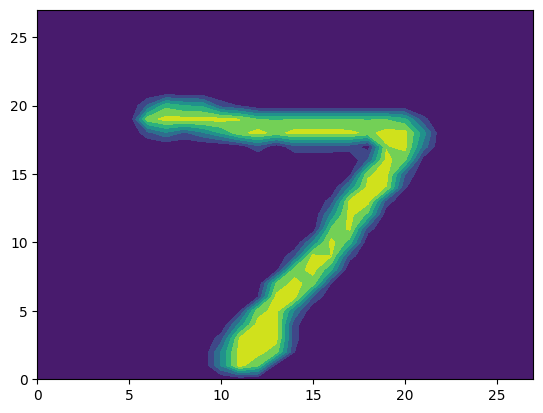

2 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 116 125 171 255 255 150  93   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 169 253 253 253 253 253 253 218  30   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 169 253 253 253 213 142 176 253 253 122   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  52 250 253 210  32  12   0   6 206 253 140   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  77 251 210  25   0   0   0 122 248 253  65   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  31  18   0   0   0   0 209 253 253  65   

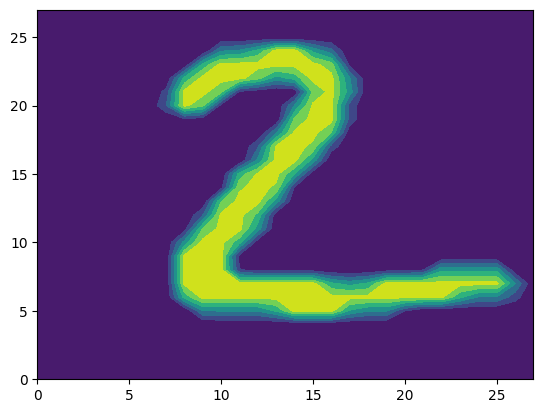

1 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  38 254 109   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  87 252  82   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 135 241   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  45 244 150   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  84 254  63   

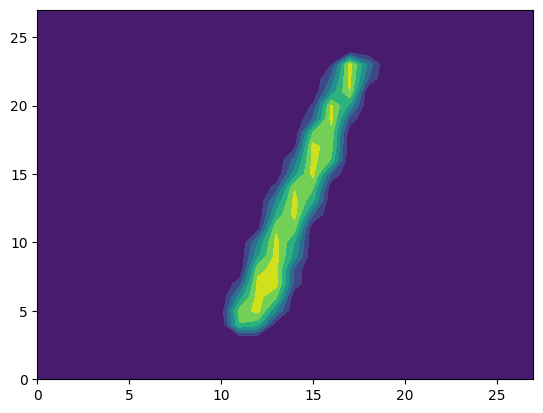

0 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  11 150 253 202  31   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  37 251 251 253 107   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  21 197 251 251 253 107   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 110 190 251 251 251 253 169 109  62   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 253 251 251 251 251 253 251 251 22

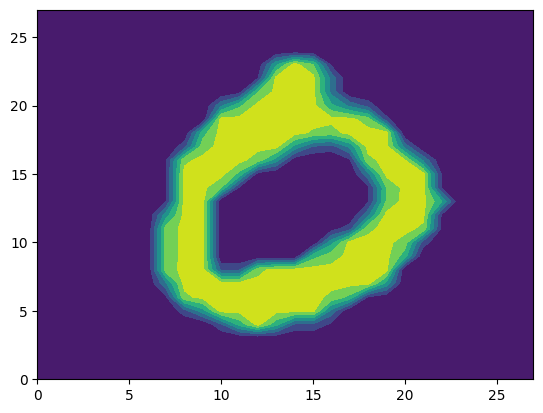

4 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  50 224   0   0   0   0   0   0   0  70  29   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 121 231   0   0   0   0   0   0   0 148 168   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   4 195 231   0   0   0   0   0   0   0  96 210  11   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  69 252 134   0   0   0   0   0   0   

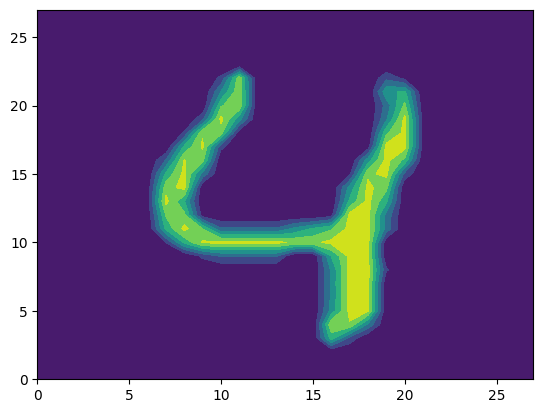

In [4]:
# visualizing for part 1
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()

In [5]:
# 2 printing shapes of the arrays using .shape
print(f"Shape of X_train: {X_train.shape}") # contains 60,000 images, each 28x28 pixels
print(f"Shape of X_test: {X_test.shape}") # contains 10,000 images, each 28x28 pixels
print(f"Shape of y_train: {y_train.shape}") # Represents 60,000 labels for the training images
print(f"Shape of y_test: {y_test.shape}") # Represents 10,000 labels for the test images

# For X_train[i] and X_test[i], the shape would be (28, 28), representing a single 28x28 pixel image.
# Example below using first image at index 0
print(f"Shape of a single image in X_train: {X_train[0].shape}")
print(f"Shape of a single image in X_test: {X_test[0].shape}")


Shape of X_train: (60000, 28, 28)
Shape of X_test: (10000, 28, 28)
Shape of y_train: (60000,)
Shape of y_test: (10000,)
Shape of a single image in X_train: (28, 28)
Shape of a single image in X_test: (28, 28)


In [6]:
# 3 - Converting training/testing data from a matrix into a vecotr of features

# Reshape X_train from (60000, 28, 28) to (60000, 784)
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)

# Reshape X_test from (10000, 28, 28) to (10000, 784)
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)

print(f"New shape of X_train: {X_train_reshaped.shape}")
print(f"New shape of X_test: {X_test_reshaped.shape}")

New shape of X_train: (60000, 784)
New shape of X_test: (10000, 784)


In [7]:
# 4 k-nearest nieghbor classifer and optimal k
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Define a range of k values to test
k_values = range(1, 10)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_reshaped, y_train)
    y_pred = knn.predict(X_test_reshaped)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"k = {k}, Accuracy: {accuracy:.4f}")

# Find the optimal k
optimal_k = k_values[accuracies.index(max(accuracies))]
print(f"Optimal k: {optimal_k} with accuracy: {max(accuracies):.4f}")

k = 1, Accuracy: 0.9691
k = 2, Accuracy: 0.9627
k = 3, Accuracy: 0.9705
k = 4, Accuracy: 0.9682
k = 5, Accuracy: 0.9688
k = 6, Accuracy: 0.9677
k = 7, Accuracy: 0.9694
k = 8, Accuracy: 0.9670
k = 9, Accuracy: 0.9659
Optimal k: 3 with accuracy: 0.9705


Accuracy with optimal k (3): 0.9705


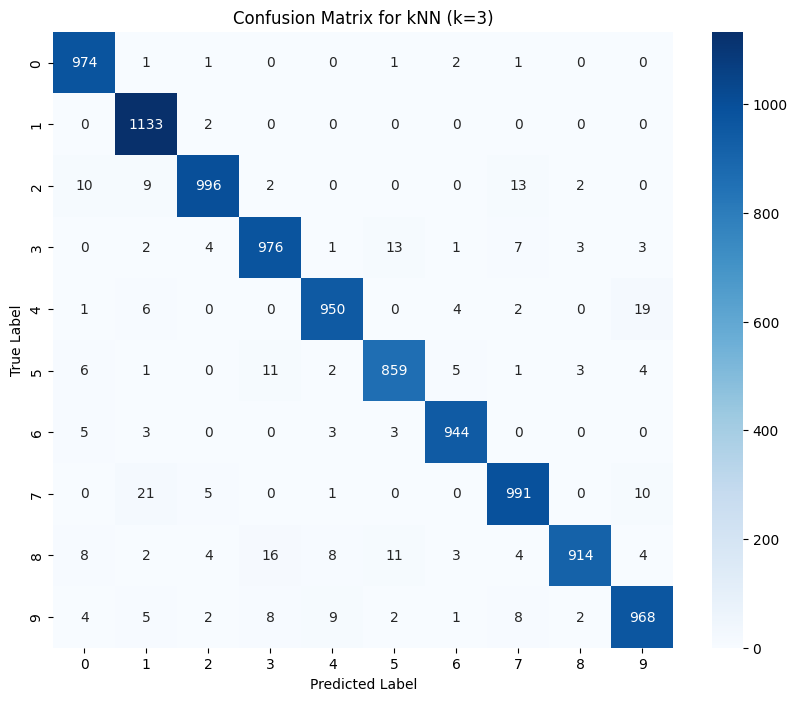


Using the confusion matrix, we can see/observe that the diagonal elements are generally very high in accuracy, indicating that the model is very good at classifying most digits.
There are some misclassifications, such as 4 being often misclassified as 9 (19 instnaces). 
9 was also often misclassified as 4 or 7 (10 & 7 instnaces, respectively). 
There are other misclassifcations, such as 2 confused with 7 (13 instances and conversely 7), 5 confused with 3(11 instances), and 8 confused with 3 (8instnaces)
Many of the common misclassifications occur between digits that share visual similarities when they are handwritten (e.g., 4 and 9; 5 and 3) (a challenge in digit recognition)
Digits like 1, 0, and 6 generally have very high classification rates, indicating their shapes are more distinct/less prone to confusion.



In [9]:
#5 predictor performance of the test set & 6 confusion matrix analysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Optimal k was found to be 3
optimal_k = 3

# training the kNN classifier with the optimal k
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal.fit(X_train_reshaped, y_train)

# Making predictions on the test set
y_pred_optimal = knn_optimal.predict(X_test_reshaped)

# Reporting the accuracy
accuracy_optimal = accuracy_score(y_test, y_pred_optimal)
print(f"Accuracy with optimal k ({optimal_k}): {accuracy_optimal:.4f}")

# Computing the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_optimal)

# Displaying the confusion matrix to help explain findings visually
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix for kNN (k={optimal_k})')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



print('''
Using the confusion matrix, we can see/observe that the diagonal elements are generally very high in accuracy, indicating that the model is very good at classifying most digits.
There are some misclassifications, such as 4 being often misclassified as 9 (19 instnaces).
9 was also often misclassified as 4 or 7 (10 & 7 instnaces, respectively).
There are other misclassifcations, such as 2 confused with 7 (13 instances and conversely 7), 5 confused with 3(11 instances), and 8 confused with 3 (8instnaces)
Many of the common misclassifications occur between digits that share visual similarities when they are handwritten (e.g., 4 and 9; 5 and 3) (a challenge in digit recognition)
Digits like 1, 0, and 6 generally have very high classification rates, indicating their shapes are more distinct/less prone to confusion.
''' )

**7. Color Photo in Matrix Form**

Color pixels are made up of 3 main colors that mix together: red, green, and blue (aka RGB). Therefore, for each pixel in a photo, the comupter stores 3 numbers, which descibes how much of these colors are in that given pixel (usually from 0 (no color) to 255 (full color)).

Turning this into tabular data (e.g., a spreadsheet) would be similar to taking the 28x28 grid of the MNIST data and flattened into one long line of 784 numbers, but 3 times for colored pictures. This would include flattening each color and connecing the long lines of numbers from end to end.

For example, if there is a color pciture that is 10x10 pixels, the red line would be 100 numbers long as with the green and blue lines (100 Red + 100 green + 100 blue) for one picture.

Each row in the machine learning dataset (e.g., X_train_reshaped) would then be a long-line of these numebrs, representing one color picture. This gives a big table where each row is a picture, and each column is a specific color value from a specific pixel location (computer breaks it down to learn whats in the pic similar to the handwritten digits).
